In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train_E1GspfA.csv')

In [ ]:
df.head()

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    18247 non-null  object
 1   hour    18247 non-null  int64 
 2   demand  18247 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 427.8+ KB


In [ ]:
df.describe()

,hour,demand
count,18247.000000,18247.000000
mean,12.614731,73.991451
std,6.544963,41.678988
min,0.000000,1.000000
25%,8.000000,43.000000
50%,13.000000,71.000000
75%,18.000000,98.000000
max,23.000000,379.000000


In [3]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    18247 non-null  datetime64[ns]
 1   hour    18247 non-null  int64         
 2   demand  18247 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 427.8 KB


In [4]:
df['year'] = df['date'].apply(lambda x: x.year)
df['month'] = df['date'].apply(lambda x: x.month)
df['day'] = df['date'].apply(lambda x: x.day)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    18247 non-null  datetime64[ns]
 1   hour    18247 non-null  int64         
 2   demand  18247 non-null  int64         
 3   year    18247 non-null  int64         
 4   month   18247 non-null  int64         
 5   day     18247 non-null  int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 855.5 KB


In [ ]:
df.head()

,date,hour,demand,year,month,day
0,2018-08-18,9,91,2018,8,18
1,2018-08-18,10,21,2018,8,18
2,2018-08-18,13,23,2018,8,18
3,2018-08-18,14,104,2018,8,18
4,2018-08-18,15,81,2018,8,18


In [ ]:
df.isna().sum()

date      0
hour      0
demand    0
year      0
month     0
day       0
dtype: int64

In [ ]:
df.duplicated().any()

False

In [ ]:
for col in df.columns:
  if col not in ['date', 'demand']:
    print(col)
    print(df[col].value_counts().count())    

hour
24
year
4
month
12
day
31


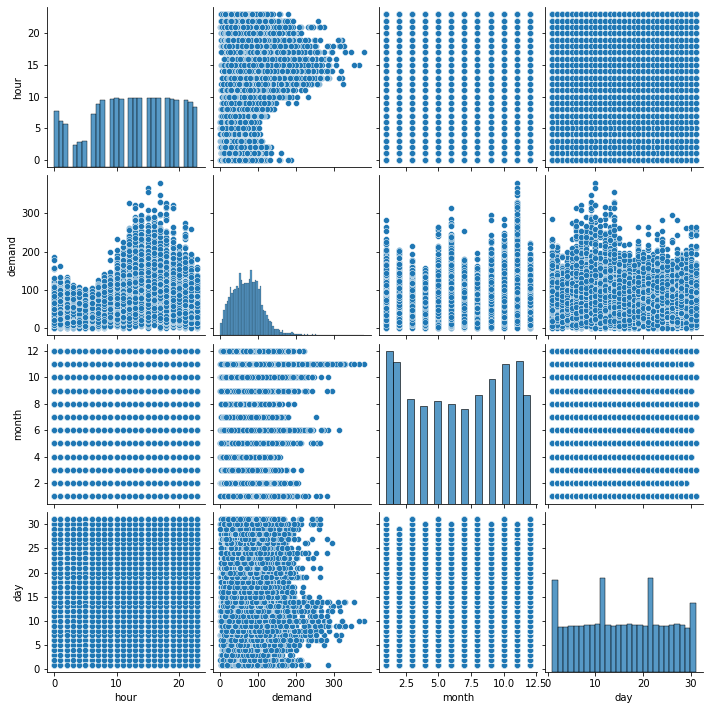

In [ ]:
sns.pairplot(df.drop('year', axis=1))

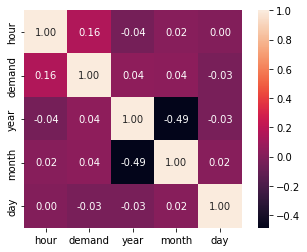

In [ ]:
sns.heatmap(df.corr(), square=True, fmt='.2f', annot=True)

In [5]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import RobustScaler, StandardScaler

In [ ]:
df.skew()

hour     -0.240621
demand    1.128438
year     -0.036972
month    -0.054793
day       0.000512
dtype: float64

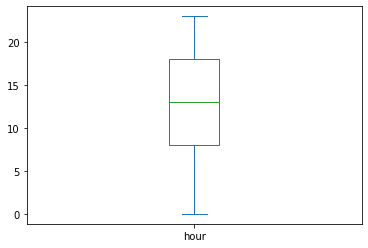

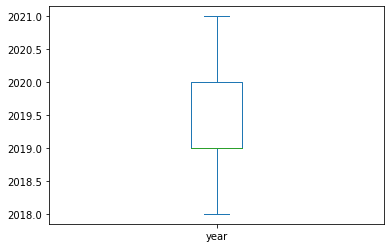

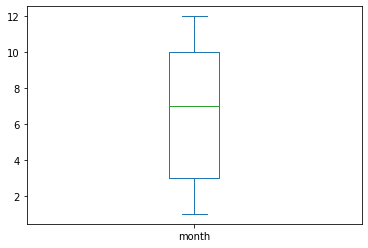

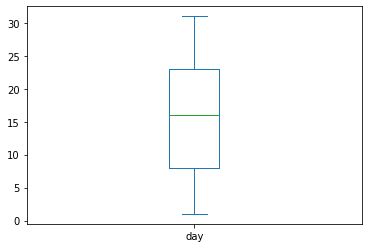

In [ ]:
for col in df.columns:
  if col not in ['date', 'demand']:
    df[col].plot(kind='box')
    plt.show()

In [ ]:
df['month'].value_counts()

1     1963
11    1837
2     1826
10    1798
9     1603
8     1406
12    1394
3     1346
5     1321
6     1281
4     1258
7     1214
Name: month, dtype: int64

In [ ]:
df['year'].value_counts()

2019    7286
2020    7145
2018    2511
2021    1305
Name: year, dtype: int64

In [ ]:
df['day'].value_counts()

27    615
17    614
10    611
19    610
18    609
23    607
8     607
22    607
12    607
16    604
9     604
21    602
13    602
11    602
15    601
26    600
28    599
25    597
14    596
1     594
24    594
2     593
7     590
20    590
6     590
5     587
3     582
4     577
29    563
30    529
31    364
Name: day, dtype: int64

In [ ]:
df['hour'].value_counts()

16    892
15    890
13    889
17    889
12    888
14    886
18    884
10    884
11    883
9     878
19    878
8     870
20    864
21    858
22    837
7     806
23    776
0     726
6     679
1     587
2     553
5     338
4     325
3     287
Name: hour, dtype: int64

In [6]:
df.drop('date', axis=1, inplace=True)

In [7]:
df['hour'] = df['hour'].astype('category')
df['hour'] = df['hour'].cat.codes
df = pd.get_dummies(df, columns=['hour'], drop_first=True)

df['year'] = df['year'].astype('category')
df['year'] = df['year'].cat.codes
df = pd.get_dummies(df, columns=['year'], drop_first=True)

df['month'] = df['month'].astype('category')
df['month'] = df['month'].cat.codes
df = pd.get_dummies(df, columns=['month'], drop_first=True)

df['day'] = df['day'].astype('category')
df['day'] = df['day'].cat.codes
df = pd.get_dummies(df, columns=['day'], drop_first=True)

In [ ]:
df.head()

,demand,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,...,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30
0,91,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,104,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,81,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
X = df.drop('demand', axis=1)
y = df['demand']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, )

In [ ]:
import statsmodels.api as sm

In [ ]:
X_endog = sm.add_constant(X_train)

In [ ]:
res = sm.OLS(y_train, X_endog)
res.fit()

In [ ]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 demand   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     53.86
Date:                Sat, 23 Apr 2022   Prob (F-statistic):               0.00
Time:                        07:24:12   Log-Likelihood:                -73562.
No. Observations:               14597   AIC:                         1.473e+05
Df Residuals:                   14529   BIC:                         1.478e+05
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.9315      2.710     18.424      0.000      44.619      55.244
hour_1        -2.4958      2.293     -1.088      0.276      -6.991       1.999
hour_2        -1.1142      2.372     -0.470      0.638      -5.763       3.534
hour_3        -3.0153      2.896     -1.041      0.298      -8.691       2.660
hour_4        -7.0459      2.787     -2.528      0.011     -12.508      -1.584
hour_5        -8.4690      2.771     -3.056      0.002     -13.901      -3.037
hour_6        -7.4531      2.240     -3.327      0.001     -11.845      -3.062
hour_7         2.2300      2.144      1.040      0.298      -1.972       6.432
hour_8         7.3179      2.095      3.492      0.000       3.211      11.425
hour_9        12.2381      2.091      5.854      0.000       8.140      16.336
hour_10       16.8216      2.078      8.095      0.000      12.748      20.895
hour_11       24.9233      2.092     11.914      0.000      20.823      29.024
hour_12       34.9018      2.083     16.754      0.000      30.818      38.985
hour_13       36.5797      2.083     17.563      0.000      32.497      40.662
hour_14       36.9068      2.083     17.719      0.000      32.824      40.990
hour_15       39.6151      2.097     18.892      0.000      35.505      43.725
hour_16       36.5212      2.083     17.535      0.000      32.439      40.604
hour_17       37.7470      2.087     18.090      0.000      33.657      41.837
hour_18       30.5944      2.098     14.581      0.000      26.482      34.707
hour_19       22.5707      2.096     10.768      0.000      18.462      26.679
hour_20       13.9829      2.107      6.638      0.000       9.854      18.112
hour_21       11.3021      2.103      5.376      0.000       7.181      15.423
hour_22        6.0809      2.102      2.893      0.004       1.961      10.201
hour_23        2.2126      2.150      1.029      0.304      -2.002       6.428
year_1         6.9517      1.078      6.449      0.000       4.839       9.065
year_2        11.9652      1.105     10.826      0.000       9.799      14.132
year_3        15.3664      1.768      8.693      0.000      11.902      18.831
month_1       -2.8403      1.362     -2.086      0.037      -5.509      -0.171
month_2        0.7735      1.558      0.496      0.620      -2.281       3.828
month_3       -5.6180      1.599     -3.513      0.000      -8.752      -2.484
month_4        1.3355      1.571      0.850      0.395      -1.743       4.414
month_5       10.0656      1.587      6.342      0.000       6.955      13.176
month_6       -7.8990      1.606     -4.917      0.000     -11.048      -4.750
month_7      -10.0635      1.551     -6.487      0.000     -13.104      -7.023
month_8       -5.9996      1.526     -3.932      0.000      -8.991      -3.009
month_9       -4.8706      1.486     -3.278      0.001      -7.783      -1.958
mo

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
linear_model = LinearRegression(n_jobs=-1)

In [ ]:
linear_model.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [ ]:
y_pred = linear_model.predict(X_test)

In [ ]:
y.mean()

73.99145064942182

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

37.325431449148795

In [ ]:
residuals = y_pred - y_test

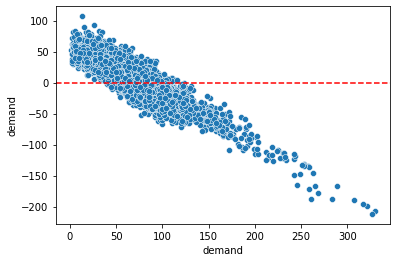

In [ ]:
sns.scatterplot(x=y,y=residuals)
plt.axhline(y=0, color='r', linestyle='--')

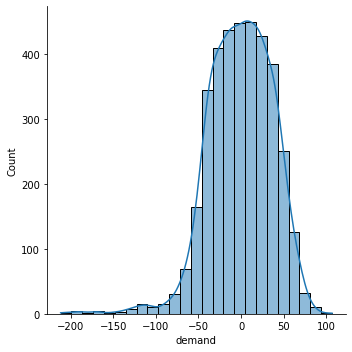

In [ ]:
sns.displot(residuals,bins=25,kde=True)

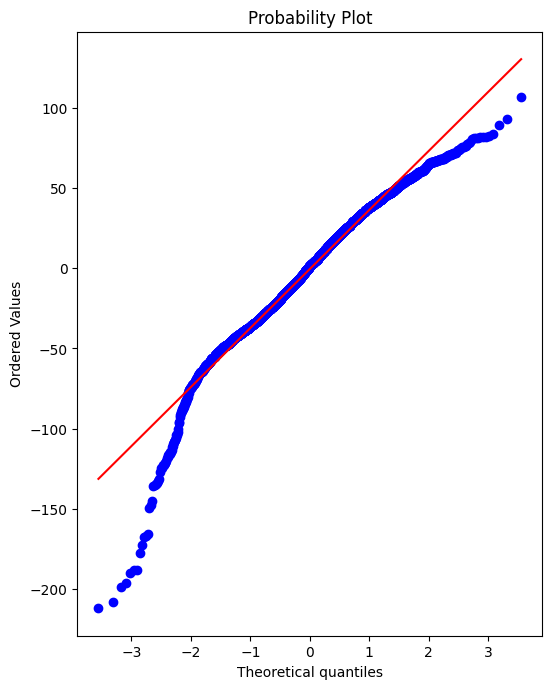

In [ ]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
_ = sp.stats.probplot(residuals,plot=ax)

In [ ]:
Base_model = ElasticNet()

In [ ]:
param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

In [ ]:
grid_model = GridSearchCV(estimator=Base_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=10)

In [ ]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error')

In [ ]:
grid_model.best_estimator_.get_params()

{'alpha': 0.1,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 1,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [ ]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.046398,0.013639,0.005506,0.004084,0.1,0.1,"{'alpha': 0.1, 'l1_ratio': 0.1}",-1546.214091,-1479.019492,-1732.785037,-1647.965566,-1578.243785,-1510.905905,-1481.067884,-1531.640422,-1604.745121,-1495.079330,-1560.766663,77.671781,7
1,0.045116,0.010016,0.005551,0.002452,0.1,0.5,"{'alpha': 0.1, 'l1_ratio': 0.5}",-1506.474973,-1438.389240,-1684.824176,-1602.563573,-1539.604478,-1470.011031,-1453.967322,-1488.533833,-1556.458077,-1459.509297,-1520.033600,73.518003,6
2,0.042262,0.010005,0.004095,0.000934,0.1,0.7,"{'alpha': 0.1, 'l1_ratio': 0.7}",-1476.354288,-1408.036731,-1647.797977,-1567.746487,-1510.936037,-1439.889145,-1434.929575,-1456.318790,-1519.137836,-1432.242307,-1489.338917,70.104269,5
3,0.054534,0.011462,0.004525,0.001379,0.1,0.9,"{'alpha': 0.1, 'l1_ratio': 0.9}",-1435.357265,-1366.981837,-1595.723983,-1519.278015,-1473.150895,-1401.439782,-1412.366521,-1412.763317,-1465.808651,-1394.551478,-1447.742174,64.893551,4
4,0.053647,0.009430,0.004396,0.001399,0.1,0.95,"{'alpha': 0.1, 'l1_ratio': 0.95}",-1423.715918,-1354.990683,-1579.637973,-1505.121191,-1463.973505,-1391.210812,-1407.144183,-1400.048288,-1449.670209,-1383.245005,-1435.875777,63.250768,3
5,0.072769,0.011329,0.004474,0.001529,0.1,0.99,"{'alpha': 0.1, 'l1_ratio': 0.99}",-1414.103650,-1345.743270,-1565.371072,-1493.495167,-1458.643767,-1383.238415,-1405.895402,-1389.774240,-1437.148639,-1373.958529,-1426.737215,61.644465,2
6,0.080175,0.018359,0.005201,0.001496,0.1,1,"{'alpha': 0.1, 'l1_ratio': 1}",-1410.885822,-1343.486041,-1561.028753,-1489.946950,-1457.005708,-1381.024902,-1406.597940,-1387.096996,-1434.262207,-1371.278108,-1424.261343,61.045463,1
7,0.035894,0.009215,0.004484,0.001556,1,0.1,"{'alpha': 1, 'l1_ratio': 0.1}",-1693.693421,-1633.865734,-1905.102818,-1812.973302,-1722.619562,-1663.865036,-1596.317121,-1687.860750,-1776.664410,-1636.606403,-1712.956856,89.541000,12
8,0.034367,0.010434,0.004003,0.001015,1,0.5,"{'alpha': 1, 'l1_ratio': 0.5}",-1699.454133,-1639.283156,-1909.887379,-1816.644224,-1726.302123,-1668.099364,-1600.988153,-1693.180039,-1780.962552,-1642.075015,-1717.687614,89.267268,13
9,0.033618,0.010807,0.005410,0.001798,1,0.7,"{'alpha': 1, 'l1_ratio': 0.7}",-1700.317028,-1639.688144,-1910.335103,-1815.369984,-1726.319277,-1667.409686,-1602.257236,-1693.973667,-1780.440436,-1642.866540,-1717.897710,88.918571,14


In [ ]:
y_pred = grid_model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

37.52723884138274

In [ ]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print(f'RMSE : {rmse}')

In [ ]:
n_trees = [100, 150, 200, 250, 300, 350, 400, 450, 500]
for n in n_trees:
    
    model = RandomForestRegressor(n_estimators=n)
    
    run_model(model,X_train,y_train,X_test,y_test)

RMSE : 40.80685288607482
RMSE : 40.87986704949979
RMSE : 40.86602811241792
RMSE : 40.8439004997158
RMSE : 40.8572097109778
RMSE : 40.82333810230281
RMSE : 40.828065971010915
RMSE : 40.8508770648236
RMSE : 40.800062859567475


In [ ]:
from sklearn.svm import SVR
model = SVR()
param_grid = {'C':[0.01, 0.1, 1, 5, 10, 100], 'epsilon': [0, 0.1,1,10,100]}
grid = GridSearchCV(model, param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)

1268      9.055385
17068     7.745967
13018    11.575837
17908     9.110434
11139    11.489125
           ...    
17801     6.855655
10161    10.392305
18042     5.744563
11896     8.306624
5857      6.633250
Name: demand, Length: 3650, dtype: float64


In [ ]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

76.95602319103763


In [11]:
import xgboost as xg

In [15]:
xgb_r = xg.XGBRegressor(objective ='reg:squarederror', n_jobs=-1)

In [16]:
xgb_r.set_params(max_depth=5, n_estimators=200)

XGBRegressor(max_depth=5, n_estimators=200, n_jobs=-1,
             objective='reg:squarederror')

In [ ]:
param_grid = {
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 150, 200]
}

In [ ]:
xg_grid = GridSearchCV(xgb_r, param_grid, scoring='neg_mean_squared_error', n_jobs=-1)

In [17]:
xgb_r.fit(X_train, y_train)

XGBRegressor(max_depth=5, n_estimators=200, n_jobs=-1,
             objective='reg:squarederror')

In [ ]:
xg_grid.best_estimator_.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 200,
 'n_jobs': -1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [18]:
xg_predict = xgb_r.predict(X_test)

In [19]:
np.sqrt(mean_squared_error(y_test, xg_predict))

35.75514457721272

In [ ]:
df_test = pd.read_csv('test_6QvDdzb.csv')

In [ ]:
df_test.head()

,date,hour
0,2021-03-01,0
1,2021-03-01,1
2,2021-03-01,2
3,2021-03-01,3
4,2021-03-01,5


In [ ]:
df_test['date'] = pd.to_datetime(df_test['date'])
df_test['year'] = df_test['date'].apply(lambda x: x.year)
df_test['month'] = df_test['date'].apply(lambda x: x.month)
df_test['day'] = df_test['date'].apply(lambda x: x.day)
df_test.drop('date', axis=1, inplace=True)

df_test['hour'] = df_test['hour'].astype('category')
df_test['hour'] = df_test['hour'].cat.codes
df_test = pd.get_dummies(df_test, columns=['hour'], drop_first=True)

df_test['year'] = df_test['year'].astype('category')
df_test['year'] = df_test['year'].cat.codes
df_test = pd.get_dummies(df_test, columns=['year'], drop_first=True)

df_test['month'] = df_test['month'].astype('category')
df_test['month'] = df_test['month'].cat.codes
df_test = pd.get_dummies(df_test, columns=['month'], drop_first=True)

df_test['day'] = df_test['day'].astype('category')
df_test['day'] = df_test['day'].cat.codes
df_test = pd.get_dummies(df_test, columns=['day'], drop_first=True)

In [ ]:
df_test.head()

,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,...,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.head()

,demand,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,...,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30
0,91,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,104,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,81,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_test.columns

Index(['hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23', 'year_1', 'year_2',
       'year_3', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'day_7', 'day_8',
       'day_9', 'day_10', 'day_11', 'day_12', 'day_13', 'day_14', 'day_15',
       'day_16', 'day_17', 'day_18', 'day_19', 'day_20', 'day_21', 'day_22',
       'day_23', 'day_24', 'day_25', 'day_26', 'day_27', 'day_28', 'day_29',
       'day_30'],
      dtype='object')

In [ ]:
X_train.columns

Index(['hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23', 'year_1', 'year_2',
       'year_3', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'day_7', 'day_8',
       'day_9', 'day_10', 'day_11', 'day_12', 'day_13', 'day_14', 'day_15',
       'day_16', 'day_17', 'day_18', 'day_19', 'day_20', 'day_21', 'day_22',
       'day_23', 'day_24', 'day_25', 'day_26', 'day_27', 'day_28', 'day_29',
       'day_30'],
      dtype='object')

In [ ]:
df_test.drop(['year_2', 'year_3'], axis=1, inplace=True)

In [ ]:
df_test.insert(24, 'year_2', 0)
df_test.insert(25, 'year_3', 0)

In [ ]:
xg_grid.predict(df_test)

array([60.810467, 49.831745, 50.658634, ..., 68.34726 , 61.582184,
       59.52408 ], dtype=float32)

In [ ]:
df_test['demand'] = xg_grid.predict(df_test)

In [ ]:
df_test.head()

,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,demand
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,60.810467
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,49.831745
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,50.658634
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,51.342674
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,49.143291


In [ ]:
df_test.drop(['demand'], axis=1, inplace=True)

In [ ]:
df_test.to_csv('final_test.csv')

In [ ]:
final_df = pd.read_csv('test_6QvDdzb.csv')

In [ ]:
final_df['demand'] = xg_grid.predict(df_test)

In [20]:
import joblib
joblib.dump(xgb_r, 'model.pkl')

['/content/drive/MyDrive/Demand_Forecasting/model.pkl']

In [ ]:
#XGBoost Performs better than other models with RMSE=35.75